In [1]:
from fastai2.basics import *
from fastai2.vision.all import *
from faststyle import *

In [2]:
source = untar_data(URLs.COCO_SAMPLE)

In [3]:
style_dir = Path('styles')
style_fns = L(style_dir/'abstract.jpg')

In [4]:
dblock = DataBlock((ImageBlock, ImageBlock), get_items=get_image_files, splitter=RandomSplitter(.1),
                   item_tfms=[Resize(128)], batch_tfms=Normalize.from_stats(*coco_stats))

In [5]:
dls = dblock.dataloaders(source, bs=16)

In [6]:
#TODO: Configure get_fs

In [7]:
cbs = StyleFsCallback(style_fns, get_fs)

In [8]:
loss_func = FastStyleLoss2(get_fs)

In [9]:
learn = style_learner(dls, style_fns, loss_func=loss_func, cbs=cbs)

(0.001096478197723627, 0.00019054606673307717)

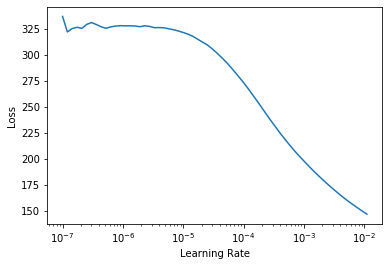

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(1, 1e-3)

KeyboardInterrupt: 

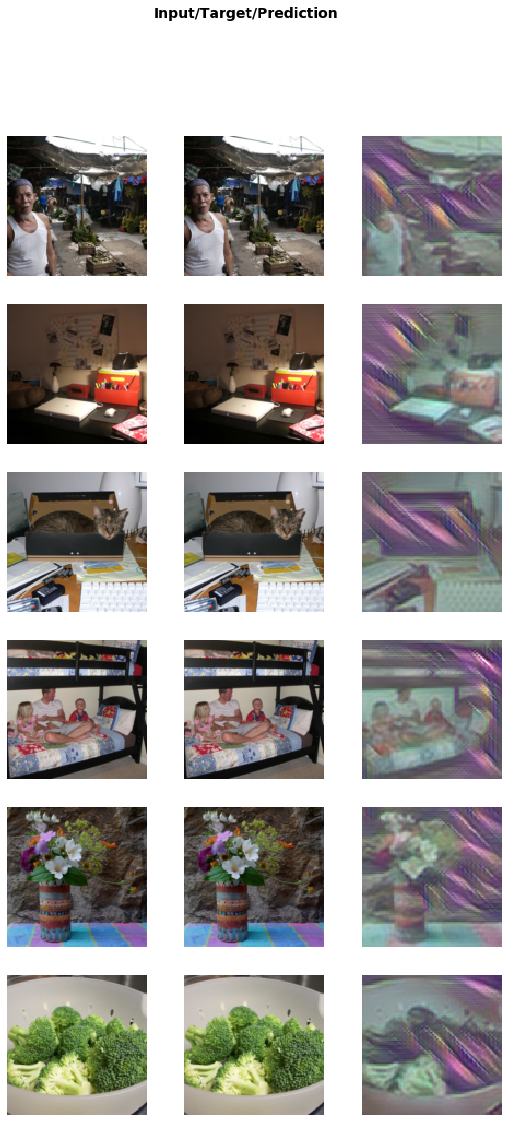

In [12]:
learn.show_results()